In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
stock_data = ['ADRO.JK']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create a dictionary to store the data
data = {}

for stock in stock_data:
    data[stock] = yf.download(stock, start, end)

# Create a list of the dataframes
company_list = [data[stock] for stock in stock_data]
company_name = ["ADRO"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ADRO.JK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'www.yahoo.com\', port=443): Max retries exceeded with url: /?guccounter=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f805765da50>: Failed to resolve \'www.yahoo.com\' ([Errno -2] Name or service not known)"))'))


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,


In [18]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,2569.787234,2602.638298,2536.297872,2568.425532,2275.573774,4.454717e+07
std,188.940923,192.890344,184.285165,188.603929,208.239581,2.475839e+07
min,2090.000000,2170.000000,2080.000000,2100.000000,1795.943115,1.511360e+07
25%,2420.000000,2460.000000,2400.000000,2420.000000,2146.579590,2.657755e+07
50%,2560.000000,2600.000000,2530.000000,2550.000000,2252.779297,3.711080e+07
75%,2705.000000,2740.000000,2670.000000,2700.000000,2437.772217,5.516330e+07
max,2960.000000,2990.000000,2940.000000,2960.000000,2930.000000,1.687916e+08


In [19]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2023-06-05 to 2024-06-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          235 non-null    float64
 1   High          235 non-null    float64
 2   Low           235 non-null    float64
 3   Close         235 non-null    float64
 4   Adj Close     235 non-null    float64
 5   Volume        235 non-null    int64  
 6   company_name  235 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 14.7+ KB


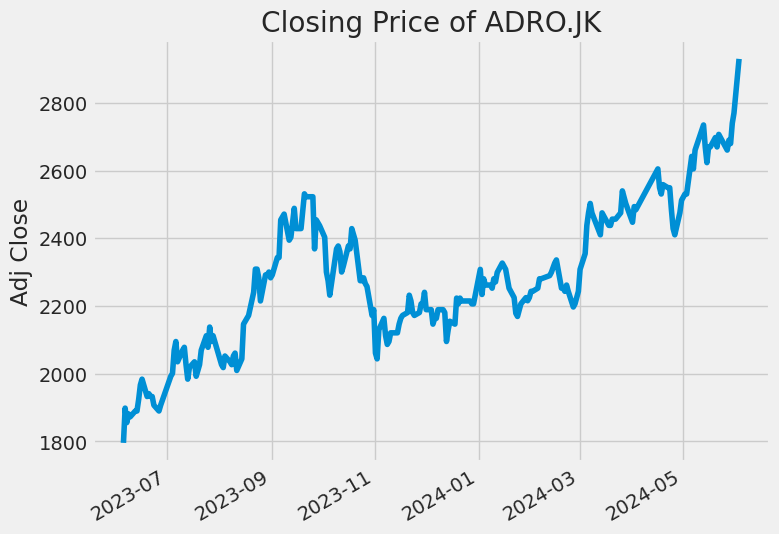

In [20]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_data[i - 1]}")
    
plt.tight_layout()

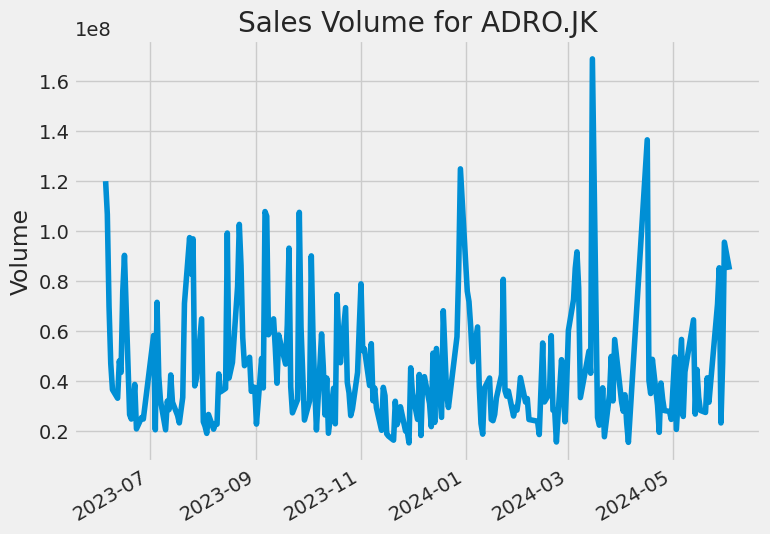

In [21]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_data[i - 1]}")
    
plt.tight_layout()

In [22]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
# Set the number of years, months, or days to subtract from the current date
years = 100
months = 0
days = 0

# Calculate the start date by subtracting the specified duration from the current date
start = datetime.now() - relativedelta(years=years, months=months, days=days)

# Convert the start date to the desired format (e.g., 'YYYY-MM-DD')
start_date = start.strftime('%Y-%m-%d')

# Get the stock quote using the dynamically set start date
df = pdr.get_data_yahoo('ADRO.JK', start=start_date, end=datetime.now())

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-07-16,1500.0,1760.0,1500.0,1730.0,664.123718,789786000
2008-07-17,1700.0,1760.0,1700.0,1700.0,652.606995,383602500
2008-07-18,1640.0,1700.0,1640.0,1640.0,629.573730,95396000
2008-07-21,1680.0,1690.0,1640.0,1680.0,644.929321,49749000
2008-07-22,1670.0,1690.0,1660.0,1670.0,641.090454,29585500
...,...,...,...,...,...,...
2024-05-28,2600.0,2710.0,2600.0,2690.0,2690.000000,85173300
2024-05-29,2690.0,2710.0,2660.0,2680.0,2680.000000,23084900
2024-05-30,2680.0,2770.0,2680.0,2740.0,2740.000000,47278200


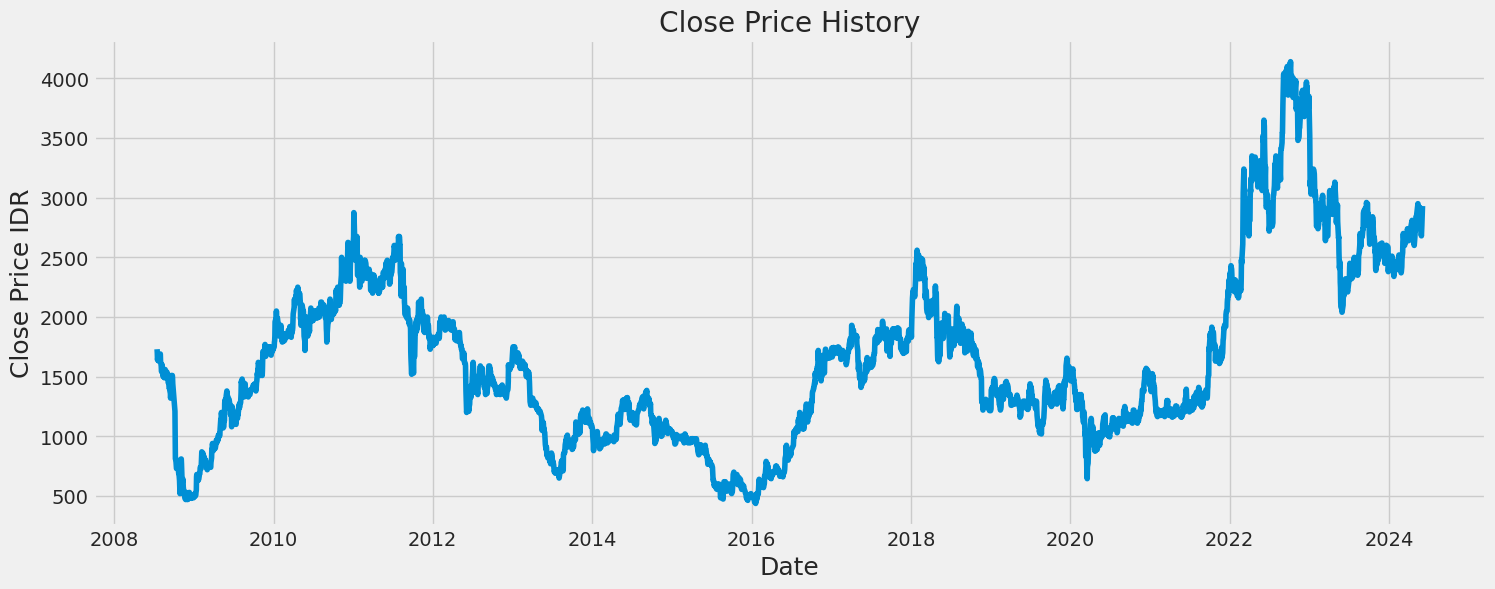

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3715

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34917634],
       [0.3410748 ],
       [0.32487173],
       ...,
       [0.62192817],
       [0.63002971],
       [0.67323792]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.34917634, 0.3410748 , 0.32487173, 0.33567378, 0.33297326,
       0.33027275, 0.32217121, 0.32217121, 0.33297326, 0.33567378,
       0.33837429, 0.32217121, 0.31136916, 0.30056711, 0.29786659,
       0.30326762, 0.31406967, 0.29786659, 0.28976506, 0.28706454,
       0.29246557, 0.29516608, 0.28436403, 0.29516608, 0.29516608,
       0.30326762, 0.29786659, 0.29786659, 0.29516608, 0.29516608,
       0.29786659, 0.29516608, 0.28976506, 0.28166352, 0.28436403,
       0.27356198, 0.27356198, 0.26275992, 0.26275992, 0.26005941,
       0.2573589 , 0.24925736, 0.23845531, 0.24655685, 0.26816095,
       0.28976506, 0.28976506, 0.28976506, 0.28976506, 0.28436403,
       0.27086146, 0.20874966, 0.15203889, 0.10072914, 0.10072914,
       0.10072914, 0.07912503, 0.07912503, 0.07912503, 0.08182555])]
[0.08182554685390224]

[array([0.34917634, 0.3410748 , 0.32487173, 0.33567378, 0.33297326,
       0.33027275, 0.32217121, 0.32217121, 0.33297326, 0.33567378,
       0.33837429, 0.32217121, 0.31

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3655/3655 ━━━━━━━━━━━━━━━━━━━━ 337s 91ms/step - loss: 0.0021


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


67.84727505956124

/tmp/ipykernel_20461/3462487869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


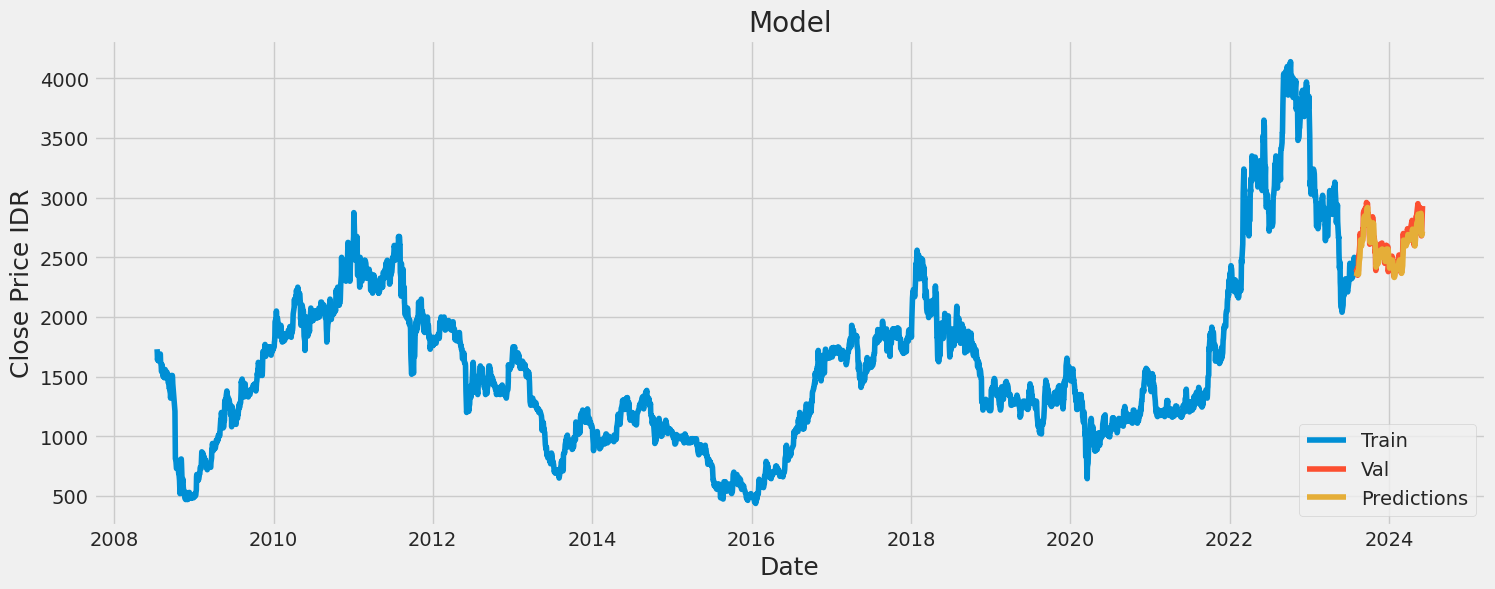

In [30]:
# Find the min and max values of 'Close' column in the first DataFrame
# y_min = df['Close'].min()
# y_max = df['Close'].max()

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Set the limits of the Y-axis to match the first plot
# plt.ylim(y_min, y_max)

plt.show()

In [31]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-08-04,2400.0,2340.492432
2023-08-07,2380.0,2355.267334
2023-08-08,2370.0,2362.988770
2023-08-09,2400.0,2361.070068
2023-08-10,2410.0,2370.291504
...,...,...
2024-05-28,2690.0,2858.227051
2024-05-29,2680.0,2763.023438
2024-05-30,2740.0,2688.990967


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(valid['Close'], valid['Predictions'])
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

Mean Absolute Percentage Error (MAPE): 2.0605459324977917 %


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ADRO.JK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'www.yahoo.com\', port=443): Max retries exceeded with url: /?guccounter=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f8074fb6ed0>: Failed to resolve \'www.yahoo.com\' ([Errno -2] Name or service not known)"))'))


       Open  High  Low  Close  Adj Close  Volume
count   0.0   0.0  0.0    0.0        0.0     0.0
mean    NaN   NaN  NaN    NaN        NaN     NaN
std     NaN   NaN  NaN    NaN        NaN     NaN
min     NaN   NaN  NaN    NaN        NaN     NaN
25%     NaN   NaN  NaN    NaN        NaN     NaN
50%     NaN   NaN  NaN    NaN        NaN     NaN
75%     NaN   NaN  NaN    NaN        NaN     NaN
max     NaN   NaN  NaN    NaN        NaN     NaN
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          0 non-null      float64
 1   High          0 non-null      float64
 2   Low           0 non-null      float64
 3   Close         0 non-null      float64
 4   Adj Close     0 non-null      float64
 5   Volume        0 non-null      float64
 6   company_name  0 non-null      object 
dtypes: float64(6), object(1)
memory usage: 0.0+ bytes
None


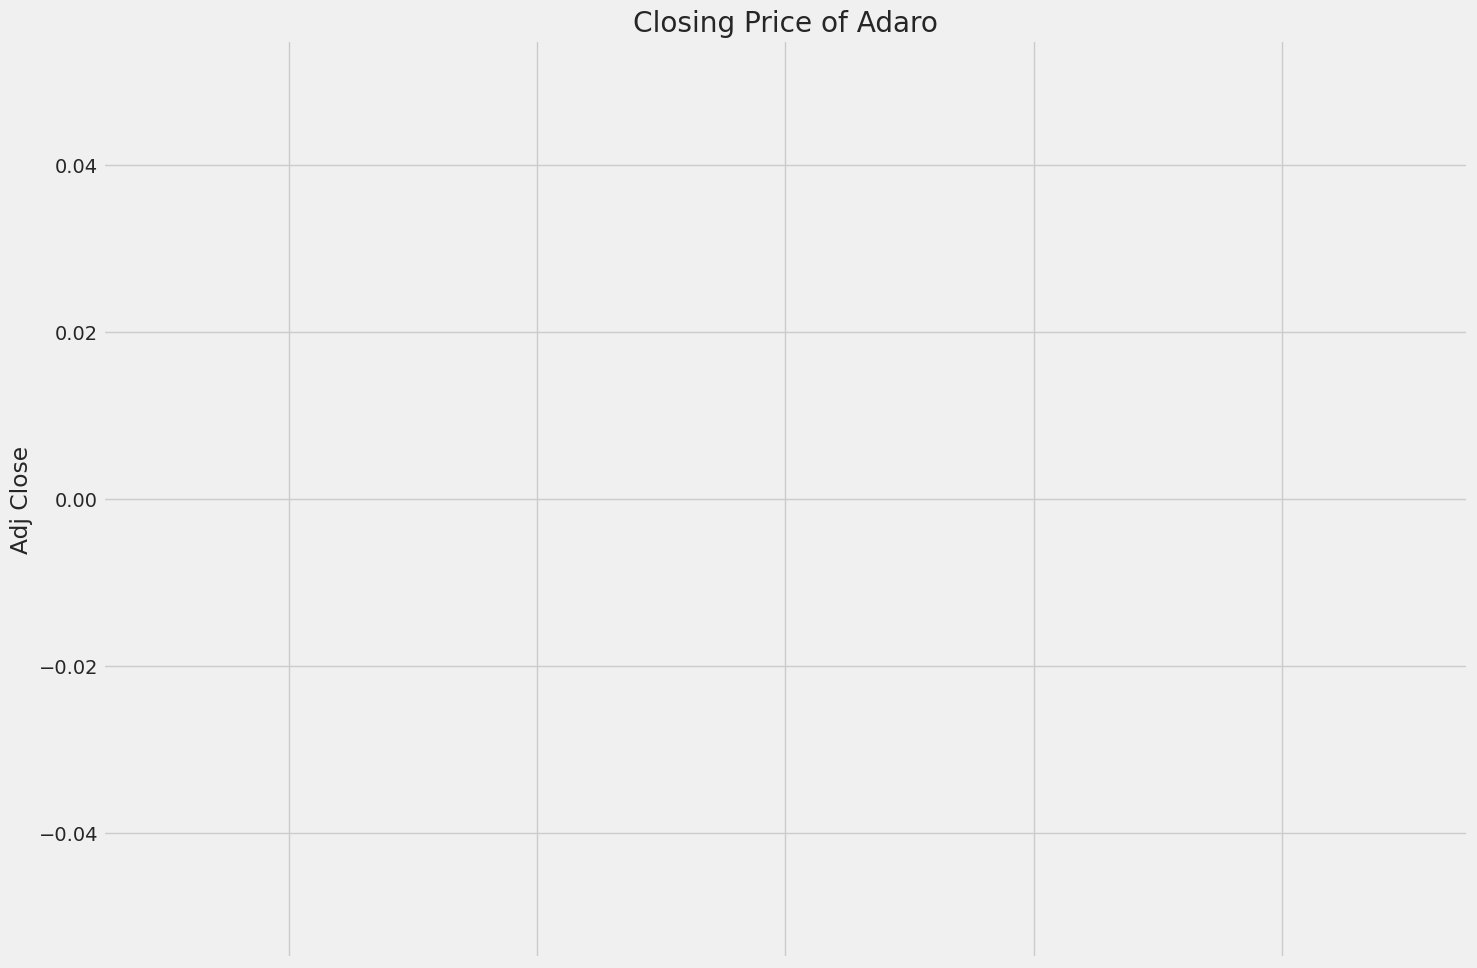

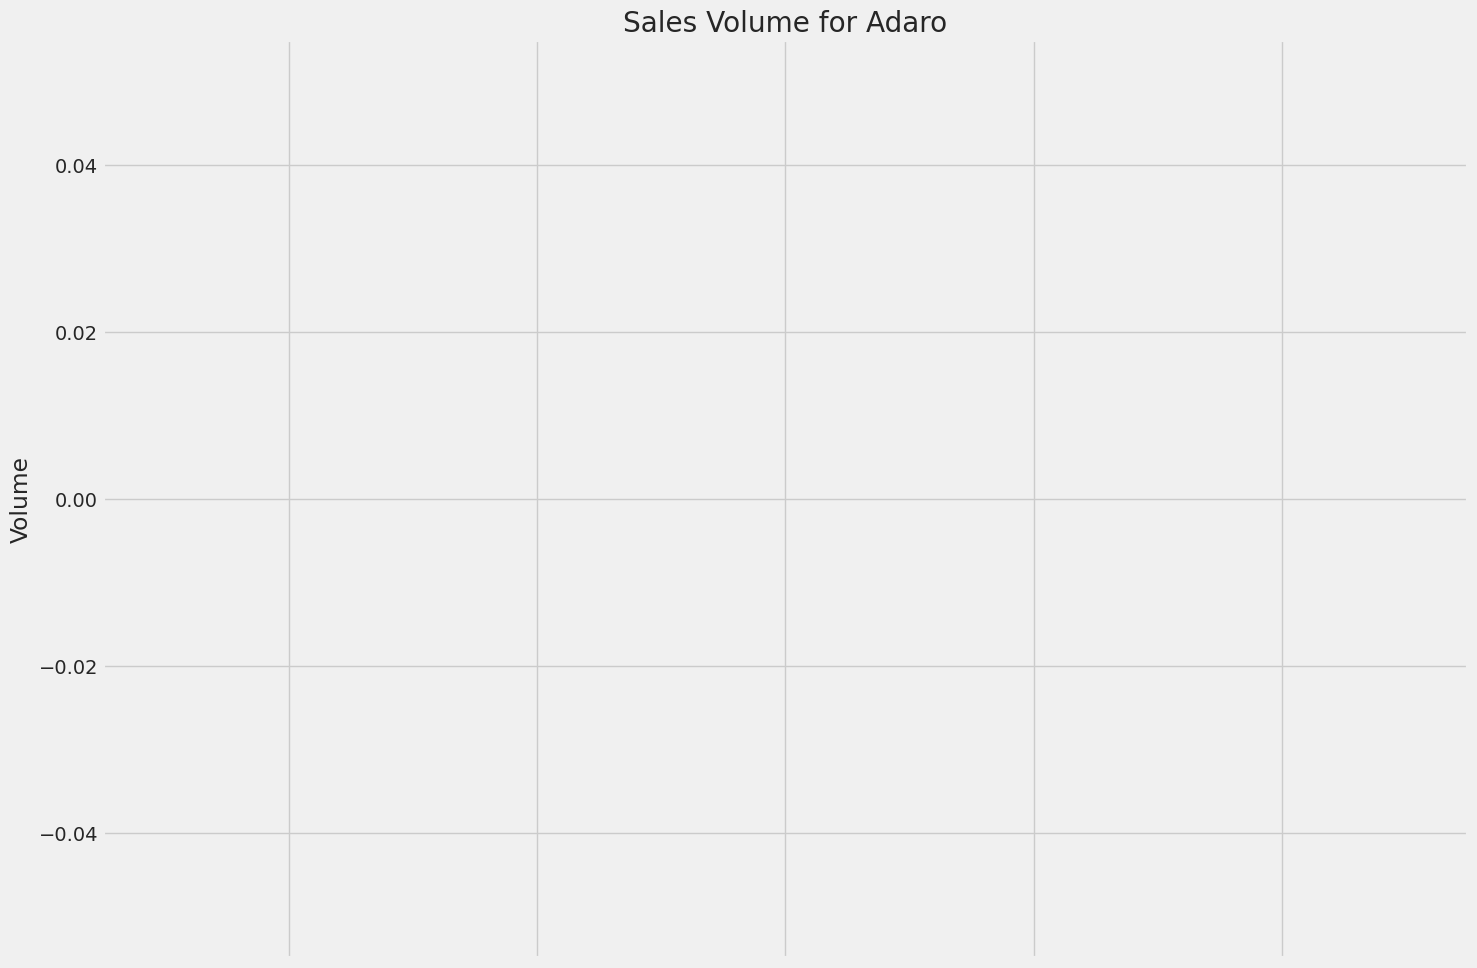

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ADRO.JK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'www.yahoo.com\', port=443): Max retries exceeded with url: /?guccounter=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f8054941090>: Failed to resolve \'www.yahoo.com\' ([Errno -2] Name or service not known)"))'))


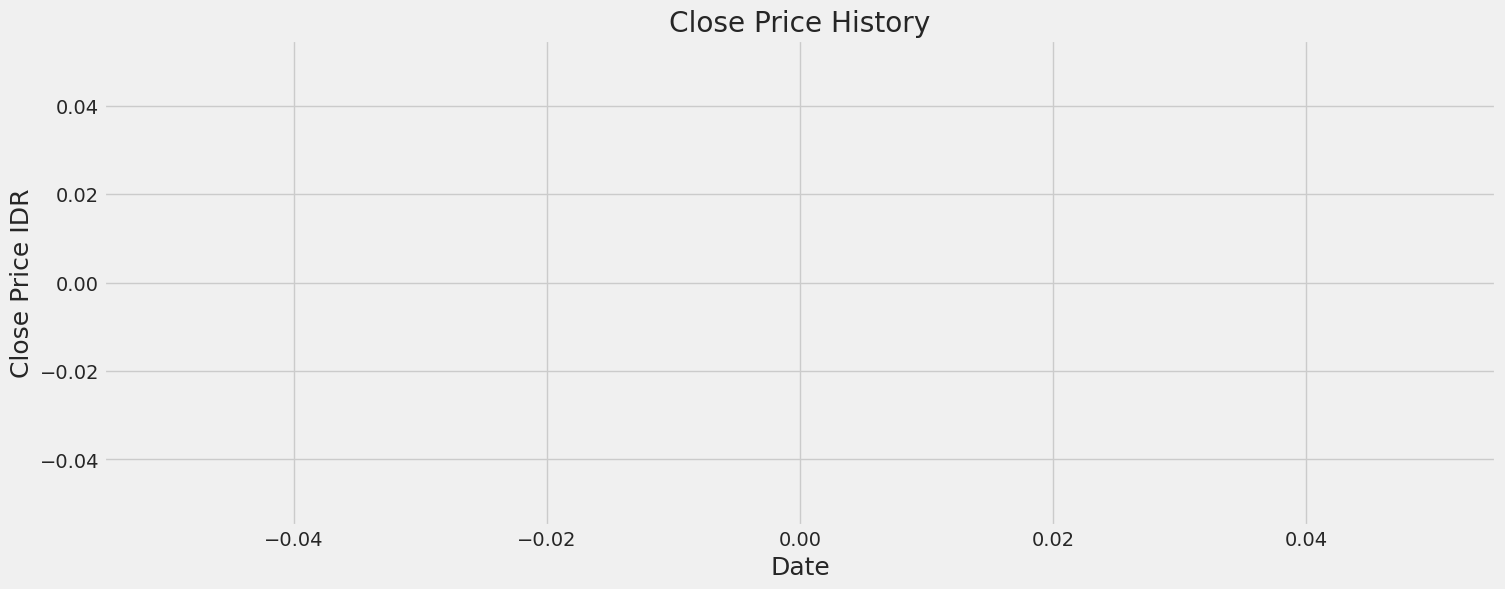

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime, timedelta

# Stock data
stock_data = ['ADRO.JK']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = {}

for stock in stock_data:
    data[stock] = yf.download(stock, start, end)

company_list = [data[stock] for stock in stock_data]
company_name = ["Adaro"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Summary Stats and General Info
print(df.describe())
print(df.info())

# Historical closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Total volume of stock traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Get the stock quote for model training
df = pdr.get_data_yahoo('ADRO.JK', start='2012-01-01', end=end)

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

data = df.filter(['Close'])
dataset = data.values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Calculate the prediction period as 10% of the data length
data_length = len(scaled_data)
prediction_period = int(data_length * 0.1)

# Split data into training and testing sets
train_data = scaled_data[:-prediction_period]
test_data = scaled_data[-(prediction_period+60):]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

x_test = []
y_test = scaled_data[-prediction_period:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Generate dates for the prediction period
future_dates = pd.date_range(end + timedelta(days=1), periods=prediction_period, freq='D')

plt.figure(figsize=(16, 6))
plt.title(f'Predicted Close Price for the Next {prediction_period} Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(future_dates, predictions)
plt.savefig(f'/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png')
plt.show()


[*********************100%%**********************]  1 of 1 completed


              Open         High          Low        Close    Adj Close  \
count   234.000000   234.000000   234.000000   234.000000   234.000000   
mean   2568.803419  2601.239316  2535.170940  2566.880342  2272.777080   
std     188.741767   192.105352   183.866942   187.511632   204.215313   
min    2090.000000  2170.000000  2080.000000  2100.000000  1795.943115   
25%    2420.000000  2460.000000  2400.000000  2420.000000  2146.579590   
50%    2555.000000  2600.000000  2525.000000  2550.000000  2252.779297   
75%    2700.000000  2740.000000  2667.500000  2697.500000  2435.244141   
max    2960.000000  2990.000000  2940.000000  2960.000000  2770.000000   

             Volume  
count  2.340000e+02  
mean   4.437676e+07  
std    2.467297e+07  
min    1.511360e+07  
25%    2.654928e+07  
50%    3.707195e+07  
75%    5.500632e+07  
max    1.687916e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 234 entries, 2023-06-05 to 2024-05-31
Data columns (total 7 columns):
 #   Column 

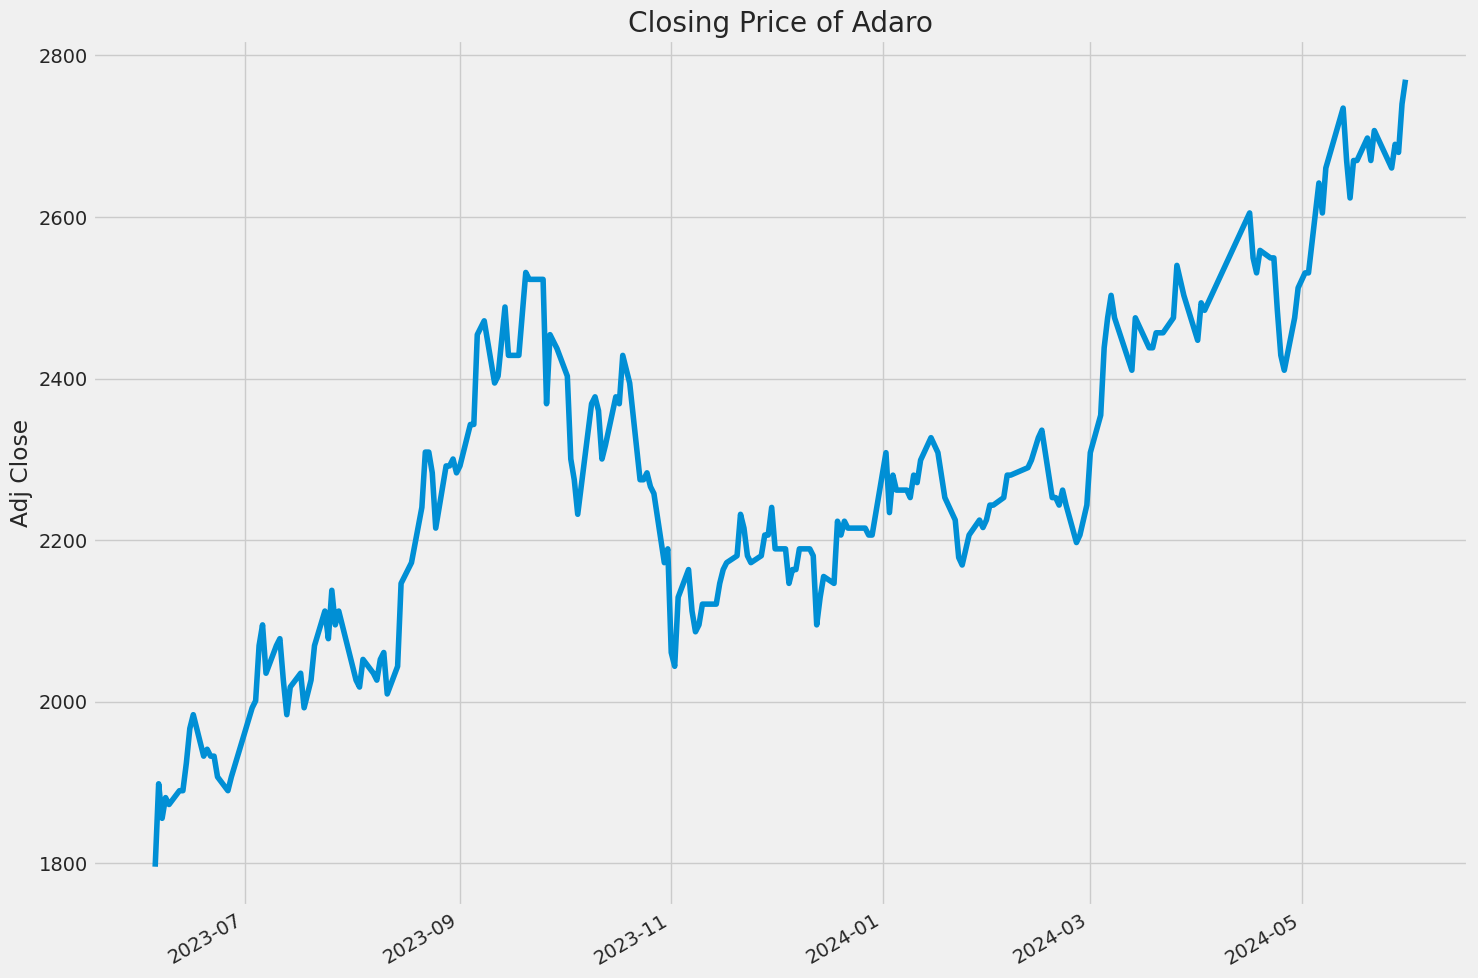

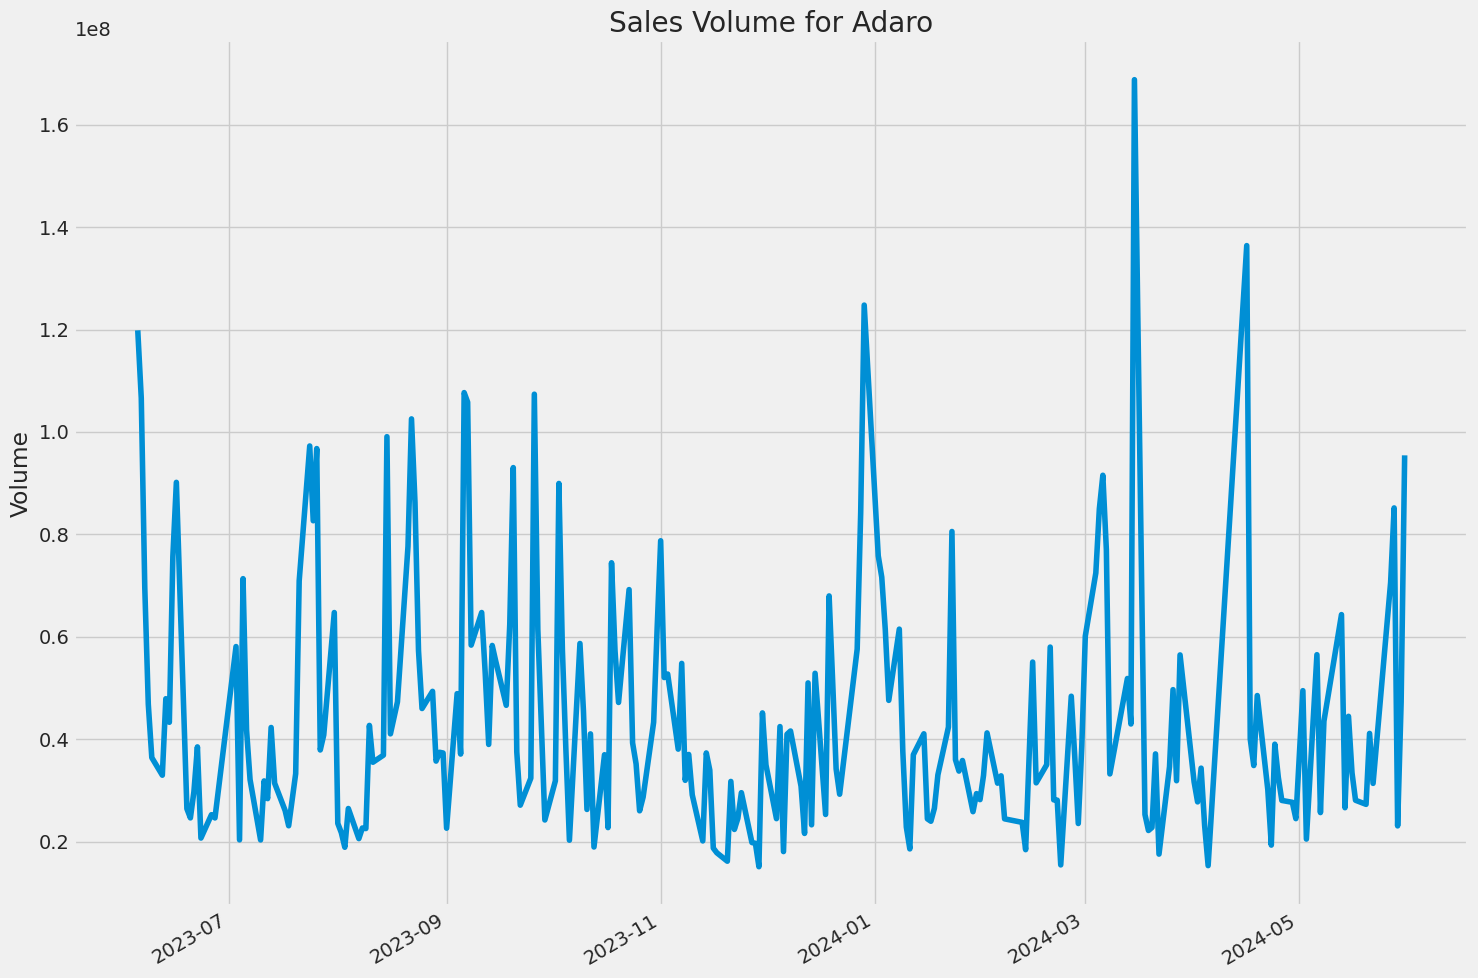

[*********************100%%**********************]  1 of 1 completed


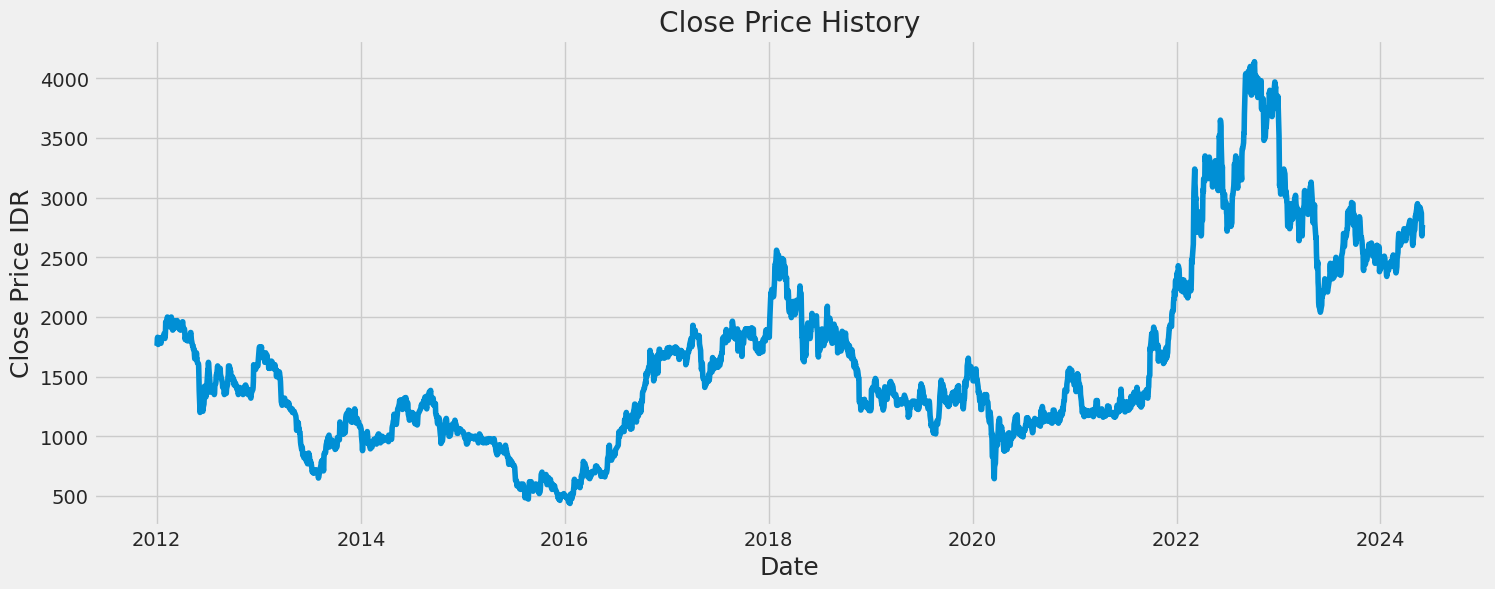

2024-06-02 00:20:19.964197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 00:20:21.162479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-02 00:20:21.837633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 00:20:21.838094: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

2638/2638 ━━━━━━━━━━━━━━━━━━━━ 164s 61ms/step - loss: 0.0027
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


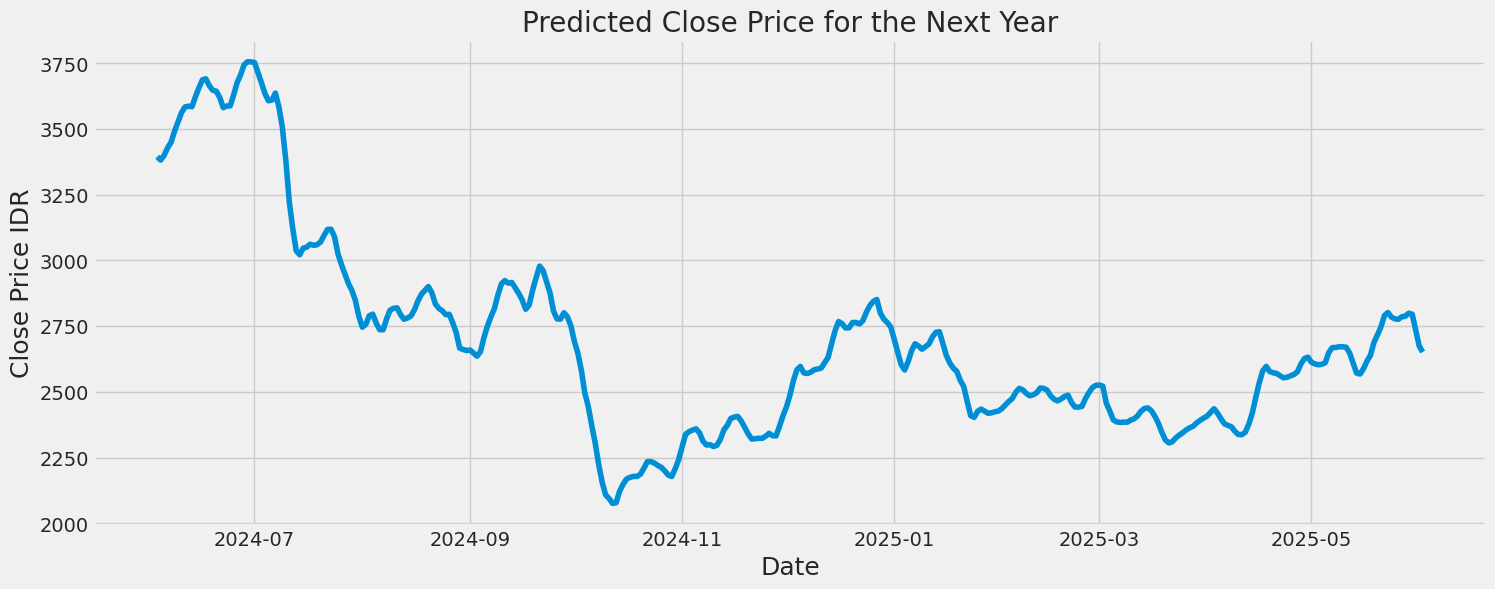

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime, timedelta

# Stock data
stock_data = ['ADRO.JK']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = {}

for stock in stock_data:
    data[stock] = yf.download(stock, start, end)

company_list = [data[stock] for stock in stock_data]
company_name = ["Adaro"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Summary Stats and General Info
print(df.describe())
print(df.info())

# Historical closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Total volume of stock traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Get the stock quote
df = pdr.get_data_yahoo('ADRO.JK', start='2012-01-01', end=end)

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

data = df.filter(['Close'])
dataset = data.values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split data into training and testing sets
train_data = scaled_data[:-365]
test_data = scaled_data[-365-60:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

x_test = []
y_test = scaled_data[-365:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Generate dates for the next year
future_dates = pd.date_range(end + timedelta(days=1), periods=365, freq='D')

plt.figure(figsize=(16, 6))
plt.title('Predicted Close Price for the Next Year')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(future_dates, predictions)
plt.savefig(f'/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png')
plt.show()

In [2]:
plt.savefig(f'/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png') 

<Figure size 640x480 with 0 Axes>

In [21]:
predicted_data = pd.DataFrame({'Date': future_dates, 'Predicted Close Price': predictions.flatten()})
print(predicted_data)

# Save the plot as a picture
plt.figure(figsize=(16, 6))
# plt.title('Predicted Close Price for the Next Year')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price IDR', fontsize=18)
# plt.plot(future_dates, predictions)
# plt.savefig('/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png')
# plt.show()



                          Date  Predicted Close Price
0   2024-05-17 18:27:44.671899            3904.485107
1   2024-05-18 18:27:44.671899            3836.398193
2   2024-05-19 18:27:44.671899            3802.282959
3   2024-05-20 18:27:44.671899            3791.015381
4   2024-05-21 18:27:44.671899            3822.544678
..                         ...                    ...
360 2025-05-12 18:27:44.671899            2819.415527
361 2025-05-13 18:27:44.671899            2848.195068
362 2025-05-14 18:27:44.671899            2895.906982
363 2025-05-15 18:27:44.671899            2900.867188
364 2025-05-16 18:27:44.671899            2874.485352

[365 rows x 2 columns]


In [25]:
# Find the index of the highest and lowest predicted prices
highest_price_index = predicted_data['Predicted Close Price'].idxmax()
lowest_price_index = predicted_data['Predicted Close Price'].idxmin()

# Get the highest and lowest predicted prices
highest_price = predicted_data.loc[highest_price_index, 'Predicted Close Price']
lowest_price = predicted_data.loc[lowest_price_index, 'Predicted Close Price']

# Get the corresponding dates for the highest and lowest prices
highest_price_date = predicted_data.loc[highest_price_index, 'Date']
lowest_price_date = predicted_data.loc[lowest_price_index, 'Date']

# Display the highest and lowest prices and their corresponding dates
print("Highest Predicted Price:", highest_price)
print("Date of Highest Price:", highest_price_date)
print("Lowest Predicted Price:", lowest_price)
print("Date of Lowest Price:", lowest_price_date)

Highest Predicted Price: 3949.1504
Date of Highest Price: 2024-06-21 18:27:44.671899
Lowest Predicted Price: 2142.3186
Date of Lowest Price: 2024-10-04 18:27:44.671899


In [1]:
import importlib
import sql

importlib.reload(sql)
from sql import show_tables, insert_tables, show_specific_tables, get_issuer
result = show_specific_tables("tb_emiten")
print(result)

Table displayed successfully!!!!!!!!!!!!!!!!!
[(1, 'BREN.JK'), (2, 'BBCA.JK'), (3, 'TPIA.JK'), (4, 'AMMN.JK'), (5, 'BBRI.JK'), (6, 'BYAN.JK'), (7, 'BMRI.JK'), (8, 'TLKM.JK'), (9, 'ASII.JK'), (10, 'BBNI.JK'), (11, 'ICBP.JK'), (12, 'DSSA.JK'), (13, 'BRPT.JK'), (14, 'AMRT.JK'), (15, 'UNVR.JK'), (16, 'BRIS.JK'), (17, 'SMMA.JK'), (18, 'CUAN.JK'), (19, 'HMSP.JK'), (20, 'DCII.JK'), (21, 'ADRO.JK'), (22, 'PANI.JK'), (23, 'CPIN.JK'), (24, 'ISAT.JK'), (25, 'UNTR.JK'), (26, 'MBMA.JK'), (27, 'KLBF.JK'), (28, 'GOTO.JK'), (29, 'MDKA.JK'), (30, 'DNET.JK'), (31, 'NCKL.JK'), (32, 'MEGA.JK'), (33, 'BELI.JK'), (34, 'ADMR.JK'), (35, 'INDF.JK'), (36, 'PGEO.JK'), (37, 'INKP.JK'), (38, 'MYOR.JK'), (39, 'INCO.JK'), (40, 'MASA.JK'), (41, 'MTEL.JK'), (42, 'BNGA.JK'), (43, 'MIKA.JK'), (44, 'FILM.JK'), (45, 'TBIG.JK'), (46, 'CMRY.JK'), (47, 'PGAS.JK'), (48, 'ANTM.JK'), (49, 'TOWR.JK'), (50, 'GGRM.JK'), (51, 'GEMS.JK'), (52, 'TCPI.JK'), (53, 'JSMR.JK'), (54, 'MEDC.JK'), (55, 'MSIN.JK'), (56, 'BUMI.JK'), (57, 'SILO

In [3]:
# row = show_specific_tables("tb_emiten")
row = get_issuer()
# print(row[1])
# ro1 = row[1] 
# print(ro1)
i = 0
j = 100
# for r in range(j):
for stock in row:
    listrow = row[i]
    print(listrow)
    # print(type(listrow))
    i = i + 1

successfully get the data issuer!
BREN.JK
BBCA.JK
TPIA.JK
AMMN.JK
BBRI.JK
BYAN.JK
BMRI.JK
TLKM.JK
ASII.JK
BBNI.JK
ICBP.JK
DSSA.JK
BRPT.JK
AMRT.JK
UNVR.JK
BRIS.JK
SMMA.JK
CUAN.JK
HMSP.JK
DCII.JK
ADRO.JK
PANI.JK
CPIN.JK
ISAT.JK
UNTR.JK
MBMA.JK
KLBF.JK
GOTO.JK
MDKA.JK
DNET.JK
NCKL.JK
MEGA.JK
BELI.JK
ADMR.JK
INDF.JK
PGEO.JK
INKP.JK
MYOR.JK
INCO.JK
MASA.JK
MTEL.JK
BNGA.JK
MIKA.JK
FILM.JK
TBIG.JK
CMRY.JK
PGAS.JK
ANTM.JK
TOWR.JK
GGRM.JK
GEMS.JK
TCPI.JK
JSMR.JK
MEDC.JK
MSIN.JK
BUMI.JK
SILO.JK
BNLI.JK
ARTO.JK
EXCL.JK
AKRA.JK
AVIA.JK
PTBA.JK
NISP.JK
TKIM.JK
ITMG.JK
CASA.JK
EMTK.JK
SMGR.JK
PNBN.JK
BDMN.JK
BTPN.JK
MKPI.JK
BINA.JK
INTP.JK
MAPI.JK
MAPA.JK
BRMS.JK
SRTG.JK
CTRA.JK
SIDO.JK
IMPC.JK
BSDE.JK
HEAL.JK
BBHI.JK
ULTJ.JK
FAPA.JK
PWON.JK
MCOL.JK
CMNT.JK
HRUM.JK
BNII.JK
CNMA.JK
BBTN.JK
BSIM.JK
FREN.JK
MPRO.JK
BFIN.JK
GOOD.JK
ESSA.JK
CLEO.JK
ACES.JK
BANK.JK
MLBI.JK
JPFA.JK
STTP.JK
BUKA.JK
ADMF.JK
MIDI.JK
APIC.JK
SMCB.JK
BBKP.JK
AALI.JK
MORA.JK
TAPG.JK
POWR.JK
SMAR.JK
RISE.JK
ABMM.JK
BJBR.JK
BSSR.J

In [15]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
tf.device('/GPU:0')

[]
